#Web-Scrapping www.PeakBaggers.com:# 
### Collecting Details on Lists of Mountains/Peaks

Use the "Run" button to execute the code.

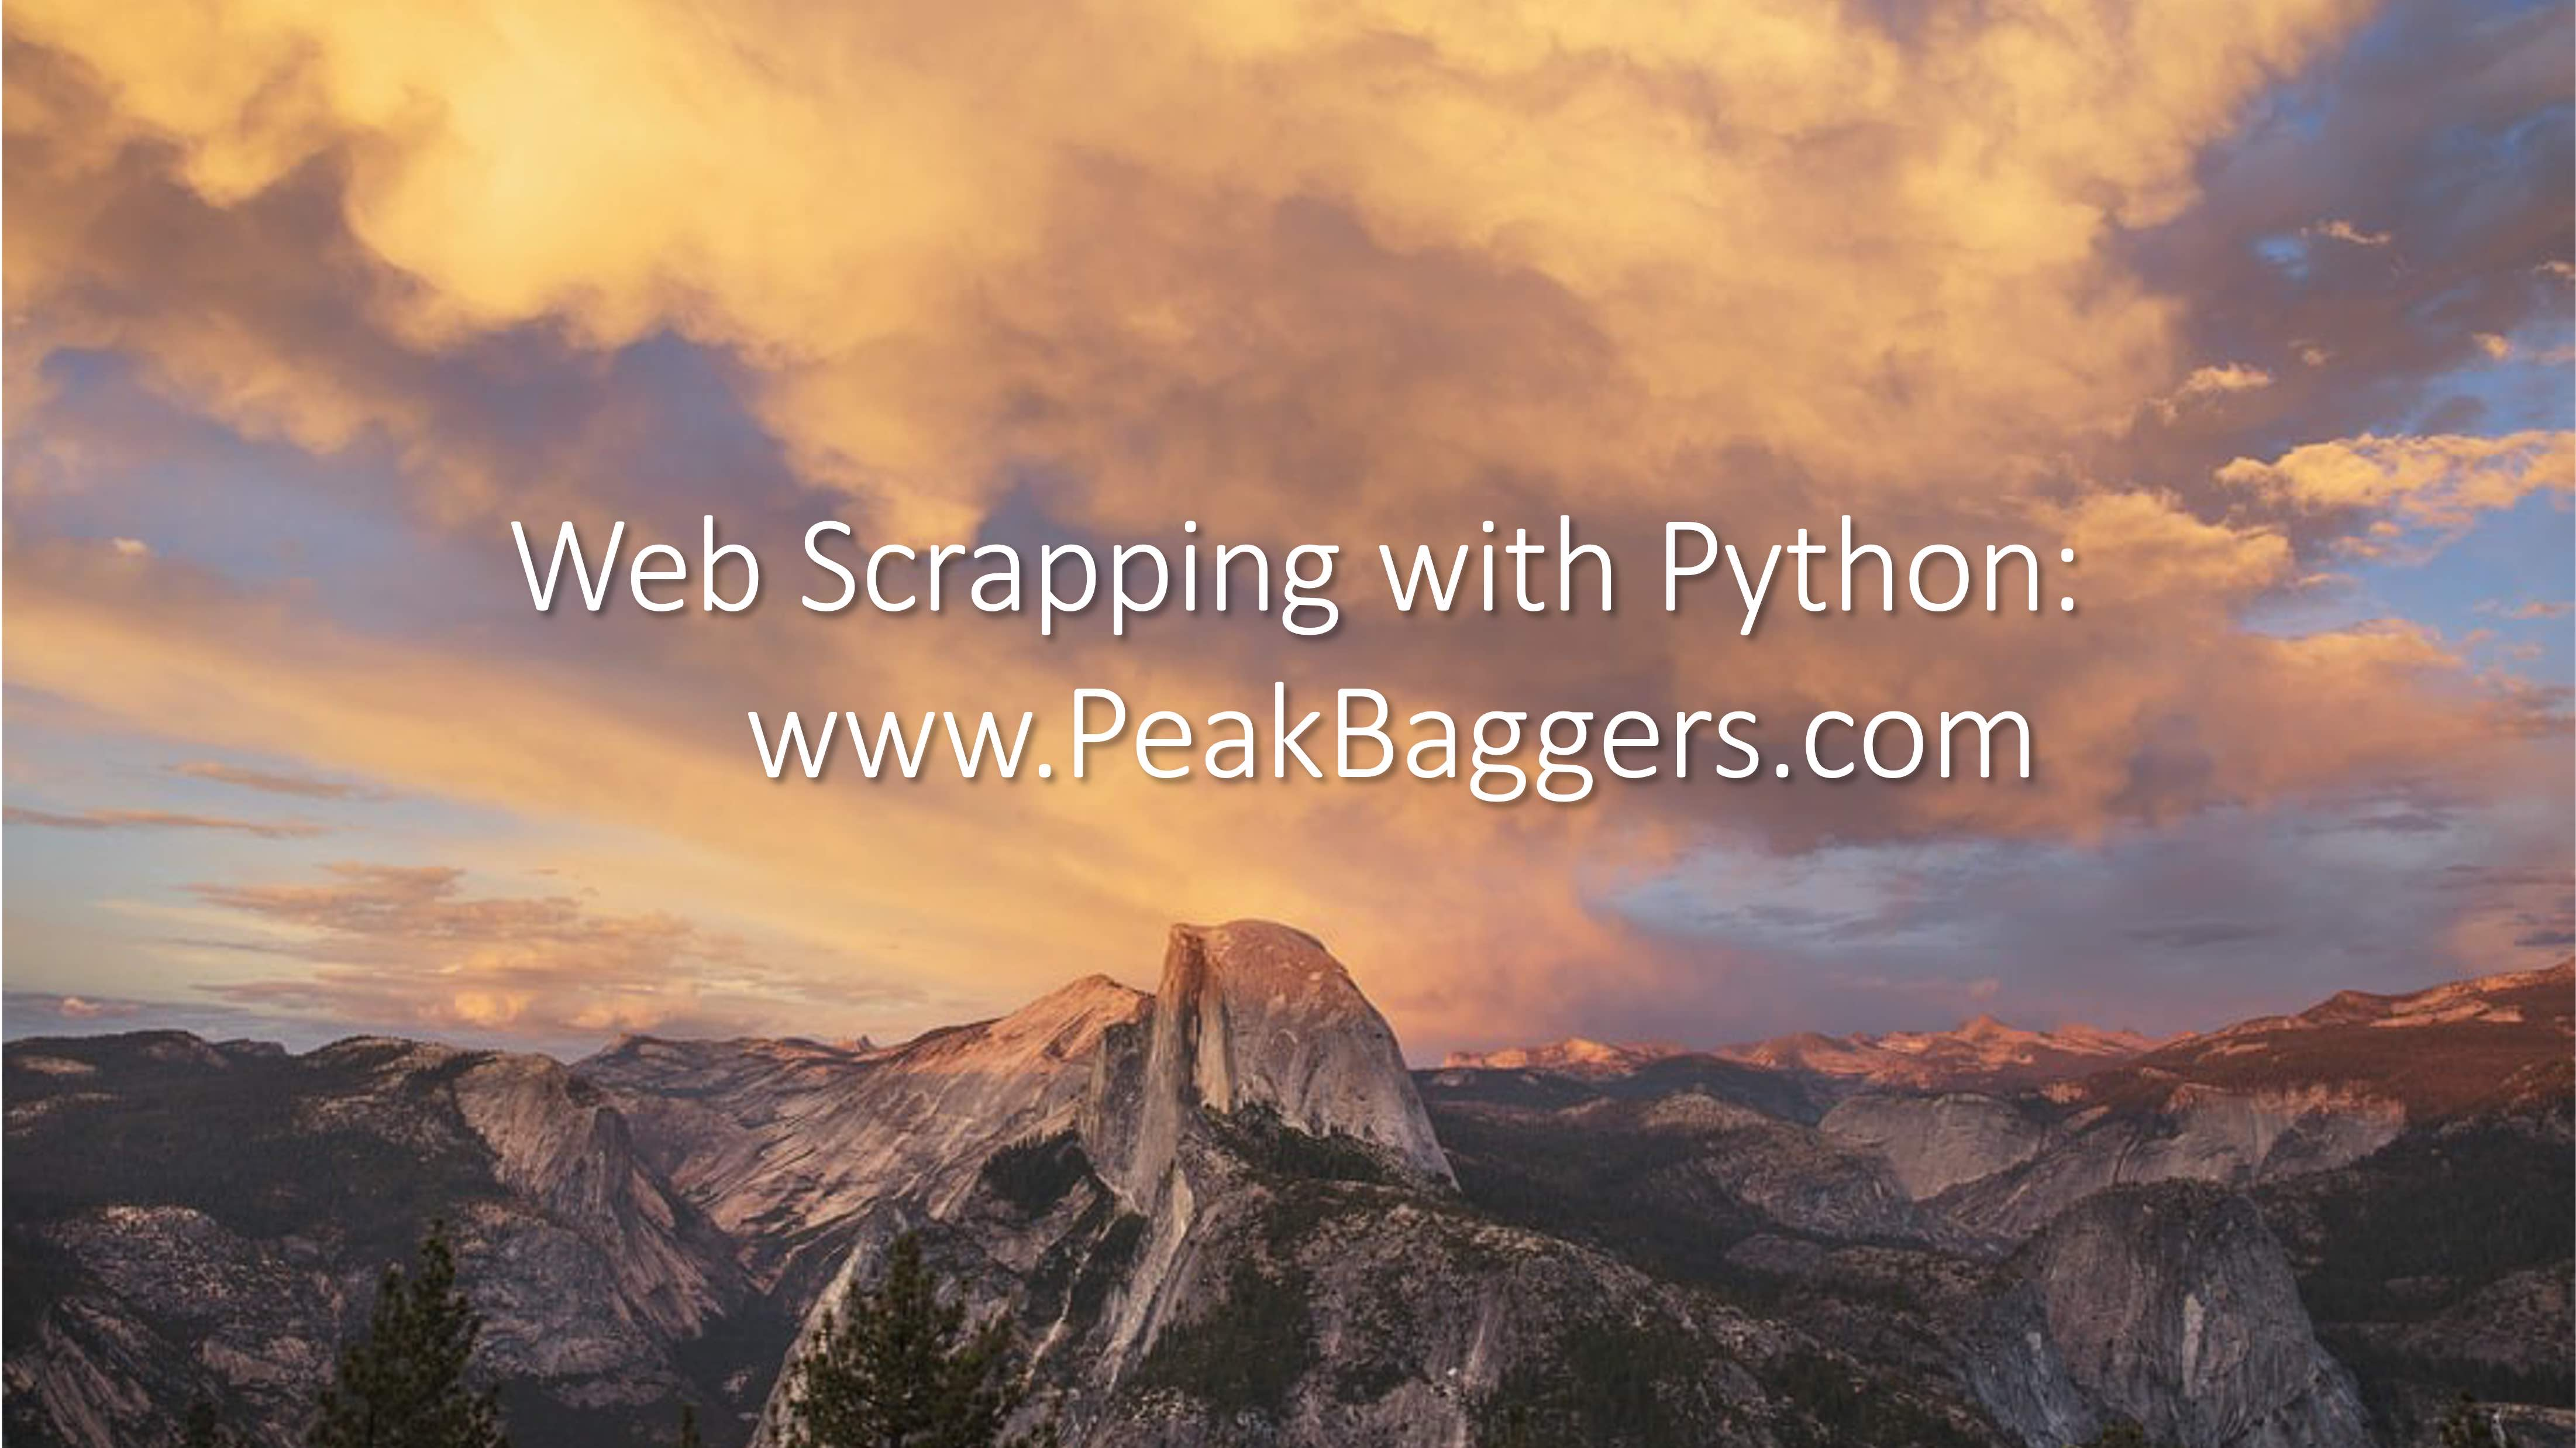
Source: Joshua Earl At Unsplash


## **Project Description:**
As an avid mountaineer & outdoor enthusiast, I decided to scrap peakbaggers.com, a website dedicated to collecting & compiling lists of major mountains & peaks.  These lists of mountains & peaks are compiled by local & international governmental organizations as well as mountaineering clubs.  In addition to lists, the website provides detailed information on major peaks & mountains.  The website currently has nine major categories of lists in which there are a numerous sub-lists:

1.  High Point Lists	
2.  Elevation Lists	
3.  Isolation Lists	
4.  Prominence Lists	
5.  Club Lists	
6.  Random Lists	
7.  Big Lists	
8.  CoHP Lists	
9.  Grid Lists


Expected output of this project is to retrieve sumamrized information about each list as detailed above, and convert the finding into a csv (comma separated values). The information gathered are:

-  **List:** is the name of list
-  **List_URL** is the URL address of that list
-  **Location** is the geographic location associated with mountains & peaks in the list
-  **#Peaks** is the number of peaks in that list
-  **#1 Peak** is the name of the highest elevation peak in the list
-  **Elev-M** is the elevation of the highest peak given in meters
-  **Peak_URL** is the URL address of the highest elevation peak

Avid mountaineers & hikers like myself will find this compilation of mountain/peak data convenient, giving easy access to the desired information at a finger tip.


#Project Outline:

Below outlines the steps and tools that are taken and used to complete the project.

1.   Import & install necessary Python libraries
2.   Define an user-friendly method to select the list to scrap 
3.   Fetching the html file using Request library & parsing the file using BeautifulSoup.
4.  Examination of parsed html file & its structure
5.  Retrieving data from the tags & forming a list
6.  Converting the file into csv file
7.  Insert the data into a Pandas DataFrame
8.  Save a CSV file in the following format:




#**Step 1:**  Importing necessary Python libraries
These libraries include 
1.  'Requests' to fetch the html source code from the website
  -  `!pip install requests --upgrade --quiet`
  -  `import requests`
  -  `response = requests.get(url_of_interest)`

2.  'BeautifulSoup' to parser the html file 
  -  `!pip install beautifulsoup4 --upgrade --quiet`
  -  `from bs4 import BeautifulSoup as bs`
  -  `doc = bs(html_source, 'html.parser')`

3.  'Pandas' to save the data into dataframe format for ease of data handling and for convenient output conversion into a csv file. 
  -  `import pandas as pd`


In [70]:
!pip install jovian --upgrade --quiet
import jovian

In [71]:
!pip install BeautifulSoup4
!pip install pandas
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd   

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Step 2: Define an user-friendly method to select the list to scrap

Names of lists within the website are not easy to remember so entering or typing out a long name seems impractical.  Hence following code is written to improve the user-interface: 

In [14]:
def get_list_table():
  '''Enter the number associated with the list of your interest.  This list number will be used parsed_data(table_tag) to retrieve the list data, and will be used for assigning the csv file name later. '''
  table_dict = {0 : 'High_Point_Lists',
                1 : 'Elevation_Lists',
                2 : 'Isolation_Lists',
                3 : 'Prominence_Lists',
                4 : 'Club_Lists',
                5 : 'Random_Lists',
                6 : 'Big_Lists',
                7 : 'US_County_High_Pt_Lists',
                8 : 'Grid_Lists'}

  print('Enter the # associated w/ the list you wish to query: \n "1" for High Point Lists \n "2" for Elevation Lists	\n "3" for Isolation Lists \n "4" for Prominence Lists	\n "5" for Club Lists	 \n "6" for Random Lists	\n "7" for Big Lists	\n "8" for CoHP Lists \n "9" for Grid Lists \n')
  list_table_num = (int(input()) - 1)
  if list_table_num not in range(0,9):
    return print('Try it again and enter the correct value... stupid')
  else: 
    t_name = table_dict[list_table_num]
  print("You have selected to see the", t_name)
  return list_table_num

We test the function below:

In [15]:
get_list_table()

Enter the # associated w/ the list you wish to query: 
 "1" for High Point Lists 
 "2" for Elevation Lists	
 "3" for Isolation Lists 
 "4" for Prominence Lists	
 "5" for Club Lists	 
 "6" for Random Lists	
 "7" for Big Lists	
 "8" for CoHP Lists 
 "9" for Grid Lists 

3
You have selected to see the Isolation_Lists


2

#Step 3: Fetching the html file using Request library & parsing the file using BeautifulSoup

The following function is developed to automate the process of html source code fetching using 'request' library, and parsing of the html file using 'BeautifulSoup' library: 

In [4]:
# the code to fetch the html source code and to parse the html file using BeautifulSoup 
 
source_url = 'https://www.peakbagger.com/ListIndx.aspx'

def get_list_page():
  '''Retrieve the web page containing the peak lists & convert it into a BeautifulSoup file'''
  response = requests.get(source_url)
  if response.status_code != 200:
    print('Status code:',response.status_code)
    raise Exception('Failed to fetch webpage {}'.format(source_url))
  doc = bs(response.text, 'html.parser')
  return doc

In [ ]:
# the html file is fetched, parsed and displayed below
get_list_page()

#Step 4:  Examination of parsed html file & its structure
Examination of the file reveals following information: 
1.  There are a large number of tables but the ones of our interest are defined by: `table_tag_gray = doc.find_all('table', class_="gray")`.  There are nine such tables.
2.  Within each table tag ('table_tag_gray'), we find that 'tr' tags with 'td' children tags are found to contain the information of our interest.  However,  only the 'tr' tags with 6 child 'td' tags are the ones that contain the information of our interest.
3.  In addition, 'a' tags under 'tr' tags contain URL information.


 

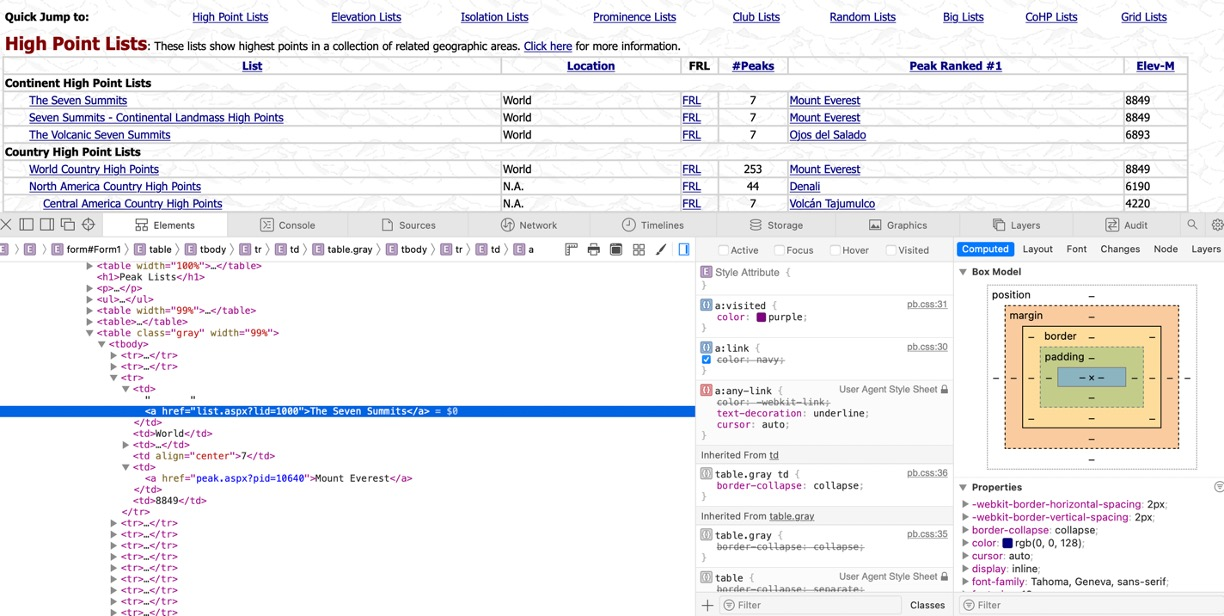



Based on this observation, we put together a function to search and define the relevant tags

In [65]:
# the code which scraps the specific data of interest.
def parsed_data(list_table_num):
  mt_list=[]
  doc = get_list_page()
  '''Returns parsed information from the table tag '''
  table_tag_gray = doc.find_all('table', class_="gray")
  tr_tags = table_tag_gray[list_table_num].find_all('tr')
  for j in range(0,len(tr_tags)):
    td_tag = tr_tags[j].find_all('td')
    a_tags = tr_tags[j].find_all('a')

  # there are many types of td_tags of which we are only interested in 'tr' tags with six 'td' tags
    if len(td_tag) == 6:

  # what we notice is that not all td_tags contain the data we need to extract, resulting in IndexError.  
  # In case of such error, we employed try & except argument  
      try:
        li_list = td_tag[0].text.strip()
        list_url = base_url + a_tags[0]['href']
        location = td_tag[1].text.strip()
        no_of_peaks = td_tag[3].text.strip()
        no1_peak = td_tag[4].text.strip()
        peak_url = base_url + a_tags[2]['href']
        elevation = td_tag[5].text.strip()
      except IndexError:
        pass
      temp_list=[li_list, list_url, location, no_of_peaks, no1_peak, elevation, peak_url]
      mt_list.append(temp_list)
  return mt_list


In [21]:
parsed_data(1)

NameError: ignored

#Step 5:  Retrieving data from the tags & forming a list 
Now that we retrieved the tags of our interest, we now specify the position of each relevant piece of information.  Here we notice that 'td_tag' contains the text information of our interest while the 'a_tags' contain the html link information.  Some of the 'a_tags' are missing html information which results in 'IndexError', hence we employ try-except statement.   

In [ ]:
# here we find the relevant value to each tag
def tags2value(td_tags, a_tags):
  mt_list =[]
  # there are many types of td_tags of which we are only interested in 'tr' tags with six 'td' tags
  if len(td_tag) == 6:
  # what we notice is that not all td_tags contain the data we need to extract, resulting in IndexError.  
  # In case of such error, we employed try & except argument  
    try:
      li_list = td_tag[0].text.strip()
      list_url = base_url + a_tags[0]['href']
      location = td_tag[1].text.strip()
      no_of_peaks = td_tag[3].text.strip()
      no1_peak = td_tag[4].text.strip()
      peak_url = base_url + a_tags[2]['href']
      elevation = td_tag[5].text.strip()
    except IndexError:
      pass
    temp_list=[li_list, list_url, location, no_of_peaks, no1_peak, elevation, peak_url]
    mt_list.append(temp_list)
  return mt_list
  # running the for-in loop statement, we create a list of our interest

#Step 6:  Converting the file into csv file
In the previous step, we created 'mt_list' which is the list of lists of mountains & peaks in the category of interest. We will now employee Python Pandas and use its DataFrame() function to convert the list into dataframe which will then converted into csv file.  Pandas library was chosen for ease of use, and for enhanced visual presentation of the data within Jupyter notebook environment.

In [ ]:
def write_csv():
  mt_list = parsed_data(list_table_num)
  df = pd.DataFrame(mt_list)
  df.columns = ['List', 'List_URL', 'Location', '#Peaks_in_List', '#1_Peak', 'Elev-M', 'Peak_URL']
  df.to_csv('{}.csv'.format(t_name), index = False)
  df_alt = df
  del df
  print('Data saved to {}.csv'.format(t_name))
  return display(df_alt)

Here we add the column names to the dataframe before converting the data into the csv file.  Moreover, we added the dataframe display() function to conduct visual inspection of the file.

#Step 7:  Putting it all together
We put together all the codes together and automate the query process. 

In [62]:

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

source_url = 'https://www.peakbagger.com/ListIndx.aspx'
base_url = 'https://www.peakbagger.com/'

table_dict = {0 : 'High_Point_Lists',
              1 : 'Elevation_Lists',
              2 : 'Isolation_Lists',
              3 : 'Prominence_Lists',
              4 : 'Club_Lists',
              5 : 'Random_Lists',
              6 : 'Big_Lists',
              7 : 'US_County_High_Pt_Lists',
              8 : 'Grid_Lists'}


def get_the_list():
  list_table_num = get_list_table()
  parsed_data(list_table_num)
  write_csv(list_table_num)

def get_list_table():
  '''Enter the number associated with the list of your interest.  This list number will be used parsed_data(table_tag) 
  to retrieve the list data, and will be used for assigning the csv file name later. '''
  print('Enter the # associated w/ the list you wish to query: \n "1" for High Point Lists \n "2" for Elevation Lists	\n "3" for Isolation Lists \n "4" for Prominence Lists	\n "5" for Club Lists	 \n "6" for Random Lists	\n "7" for Big Lists	\n "8" for CoHP Lists \n "9" for Grid Lists \n')
  list_table_num = (int(input()) - 1)
  if list_table_num not in range(0,9):
    return print('Try it again and enter the correct value... stupid')
  else: 
    t_name = table_dict[list_table_num]
  print("You have selected to see the", t_name)
  return list_table_num

def get_list_page():
  '''Retrieve the web page containing the peak lists & convert it into a BeautifulSoup file'''
  response = requests.get(source_url)
  if response.status_code != 200:
    print('Status code:',response.status_code)
    raise Exception('Failed to fetch webpage {}'.format(source_url))
  doc = bs(response.text, 'html.parser')
  return doc


# the function which scraps the specific data of interest.
def parsed_data(list_table_num):
  mt_list=[]
  doc = get_list_page()
  '''Returns parsed information from the table tag '''
  table_tag_gray = doc.find_all('table', class_="gray")
  tr_tags = table_tag_gray[list_table_num].find_all('tr')
  for j in range(0,len(tr_tags)):
    td_tag = tr_tags[j].find_all('td')
    a_tags = tr_tags[j].find_all('a')

  # there are many types of td_tags of which we are only interested in 'tr' tags with six 'td' tags
    if len(td_tag) == 6:

  # what we notice is that not all td_tags contain the data we need to extract, resulting in IndexError.  
  # In case of such error, we employed try & except argument  
      try:
        li_list = td_tag[0].text.strip()
        list_url = base_url + a_tags[0]['href']
        location = td_tag[1].text.strip()
        no_of_peaks = td_tag[3].text.strip()
        no1_peak = td_tag[4].text.strip()
        peak_url = base_url + a_tags[2]['href']
        elevation = td_tag[5].text.strip()
      except IndexError:
        pass
      temp_list=[li_list, list_url, location, no_of_peaks, no1_peak, elevation, peak_url]
      mt_list.append(temp_list)
  return mt_list


def write_csv(list_table_num):
  mt_list = parsed_data(list_table_num)
  t_name = table_dict[list_table_num]
  df = pd.DataFrame(mt_list)
  df.columns = ['List', 'List_URL', 'Location', '#Peaks_in_List', '#1_Peak', 'Elev-M', 'Peak_URL']
  df.to_csv('{}.csv'.format(t_name), index = False)
  df_alt = df
  del df
  print('Data saved to {}.csv'.format(t_name))
  return display(df_alt)




In [63]:
get_the_list()

Enter the # associated w/ the list you wish to query: 
 "1" for High Point Lists 
 "2" for Elevation Lists	
 "3" for Isolation Lists 
 "4" for Prominence Lists	
 "5" for Club Lists	 
 "6" for Random Lists	
 "7" for Big Lists	
 "8" for CoHP Lists 
 "9" for Grid Lists 

1
You have selected to see the High_Point_Lists
Data saved to High_Point_Lists.csv


,List,List_URL,Location,#Peaks_in_List,#1_Peak,Elev-M,Peak_URL
0,The Seven Summits,https://www.peakbagger.com/list.aspx?lid=1000,World,7,Mount Everest,8849,https://www.peakbagger.com/peak.aspx?pid=10640
1,Seven Summits - Continental Landmass High Points,https://www.peakbagger.com/list.aspx?lid=1001,World,7,Mount Everest,8849,https://www.peakbagger.com/peak.aspx?pid=10640
2,The Volcanic Seven Summits,https://www.peakbagger.com/list.aspx?lid=1002,World,7,Ojos del Salado,6893,https://www.peakbagger.com/peak.aspx?pid=8569
3,World Country High Points,https://www.peakbagger.com/list.aspx?lid=1100,World,253,Mount Everest,8849,https://www.peakbagger.com/peak.aspx?pid=10640
4,North America Country High Points,https://www.peakbagger.com/list.aspx?lid=1101,N.A.,44,Denali,6190,https://www.peakbagger.com/peak.aspx?pid=271
...,...,...,...,...,...,...,...
245,France (and Dependencies) National Park High P...,https://www.peakbagger.com/list.aspx?lid=1852,Europe-France,10,Barre des Écrins,4102,https://www.peakbagger.com/peak.aspx?pid=9904
246,Selected World City High Points,https://www.peakbagger.com/list.aspx?lid=190,World,5,Cerro Ajusco,3937,https://www.peakbagger.com/peak.aspx?pid=8027
247,Selected U.S. City High Points,https://www.peakbagger.com/list.aspx?lid=193,N.A.-USA,30,Grandview Peak,2868,https://www.peakbagger.com/peak.aspx?pid=5443
248,"King County, WA City High Points",https://www.peakbagger.com/list.aspx?lid=19312,N.A.-USA-WA,38,Cougar Mountain-Belleuve High Point,440,https://www.peakbagger.com/peak.aspx?pid=76667


#**Summary**  
*  The codes written herewithin are fully automated - from fetching the html file from the website using 'request' library, parsing the file with 'BeautifulSoup' library then distilling the pertinent data using Python.  Finally, the distilled data was converted into Pandas dataframe format which in turn converted into csv file.  For convenient user-interface, user could simply input a number to choose the information that one wish to scrap. 

*  Initially, I try to use a library specifically design to scrap tables from html file [`from html_table_parser.parser import HTMLTableParser`].  The table parser library was unable to  the tables correctly - it put a whole table into one cell.  Moreover, string data found in the list names contain too many special characters such as comma, space, single quotes.  Due to his difficulties, the whole parsing process could not be automated. 

*  Bottomline, I had a lot of fun doing this project as I learned a lot from many MANY trial-errors.  In the future, as an add-on to the project, I would like to convert scrapped data into a database and write short program in which use SQL to access the data which would make the project more interesting.

In [72]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab
